In [2]:
# !conda install prophet

In [1]:
import pandas as pd

In [2]:
from prophet import Prophet

In [3]:
model = Prophet()

In [4]:
data = pd.read_csv("Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data = data.rename(columns={"Date":'ds', "Close": 'y'})
data.head()

,ds,Open,High,Low,y,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
data['y'] = data['y'].str.replace(',', "").astype(float)
data.head()

,ds,Open,High,Low,y,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
model = Prophet()
model.fit(data)

17:15:24 - cmdstanpy - INFO - Chain [1] start processing
17:15:24 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
import matplotlib.pyplot as plt

# 예측 데이터 프레임 생성 - 30일간 예측해보기
future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,580.763755,535.631571,679.049754,580.763755,580.763755,22.006403,22.006403,22.006403,-12.465986,-12.465986,-12.465986,34.472388,34.472388,34.472388,0.0,0.0,0.0,602.770158
1,2012-01-04,581.177568,529.607128,674.468427,581.177568,581.177568,22.228660,22.228660,22.228660,-12.136192,-12.136192,-12.136192,34.364852,34.364852,34.364852,0.0,0.0,0.0,603.406228
2,2012-01-05,581.591381,520.429026,671.423401,581.591381,581.591381,19.393502,19.393502,19.393502,-14.695230,-14.695230,-14.695230,34.088732,34.088732,34.088732,0.0,0.0,0.0,600.984883
3,2012-01-06,582.005194,525.915010,673.238962,582.005194,582.005194,19.432721,19.432721,19.432721,-14.216108,-14.216108,-14.216108,33.648828,33.648828,33.648828,0.0,0.0,0.0,601.437915
4,2012-01-09,583.246633,522.080419,667.115204,583.246633,583.246633,17.327435,17.327435,17.327435,-14.124327,-14.124327,-14.124327,31.451762,31.451762,31.451762,0.0,0.0,0.0,600.574068


c:\Users\Admin\anaconda3\envs\gumi_env310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Admin\anaconda3\envs\gumi_env310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


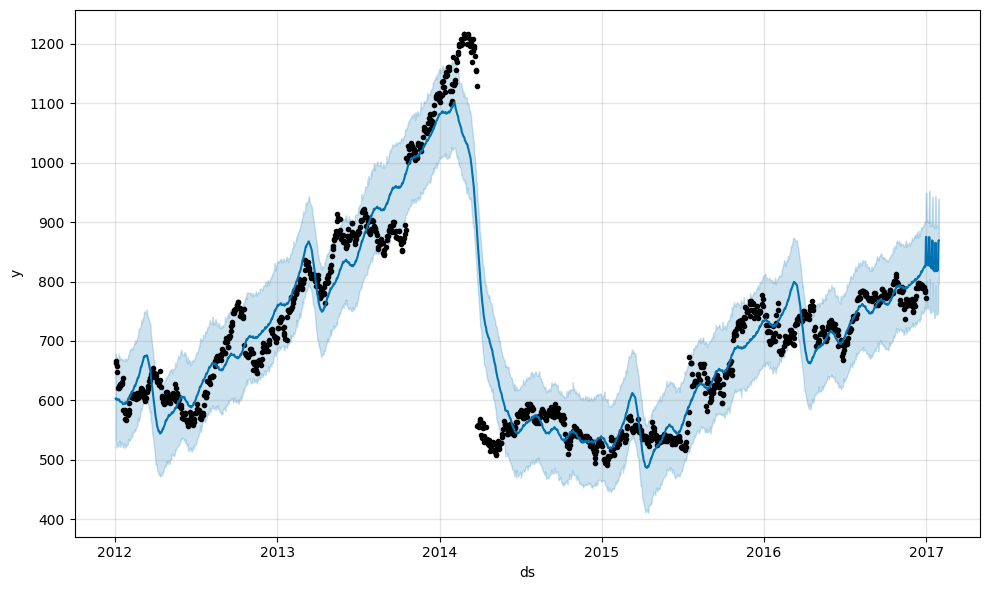

In [10]:
# 시각화
fig1 = model.plot(forecast)
plt.show()